In [1]:
import pylab
import math
class modulo:
    def __init__(self,z,v,m):
        self.z=z
        self.v=v
        self.b= 17.1*10**(-6)
        self.g=9.81
        self.m=m
    def evaluate(self,f,delta_t):
        self.z=self.v*delta_t+self.z
        self.v=((f/self.m)-(self.b*self.v)/self.m-self.g)*delta_t+self.v

In [2]:
class PIDSat:

    def __init__(self, kp, ki, kd, sat):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.saturation = sat
        self.integral = 0
        self.prev_error = 0
        self.saturation_flag = False

    def evaluate(self, error, delta_t):
        if not(self.saturation_flag):
            self.integral = self.integral + error * delta_t
        deriv = (error - self.prev_error) / delta_t
        self.prev_error = error
        output = self.kp * error + self.ki * self.integral + self.kd * deriv
        if output > self.saturation:
            output = self.saturation
            self.saturation_flag = True
        elif output <= -self.saturation:
            output = -self.saturation
            self.saturation_flag = True
        else:
            self.saturation_flag = False

        return output

300000
-41.22222265523868
-0.00023522712323549046


D:\Users\ress\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


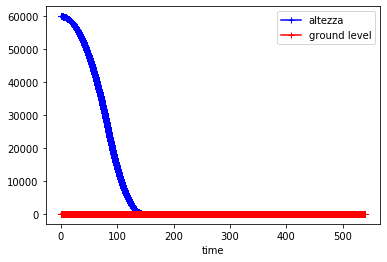

D:\Users\ress\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


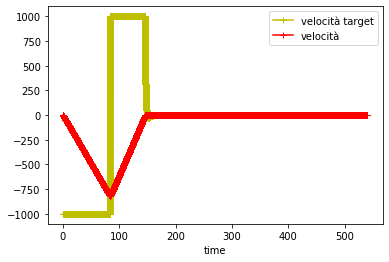

D:\Users\ress\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


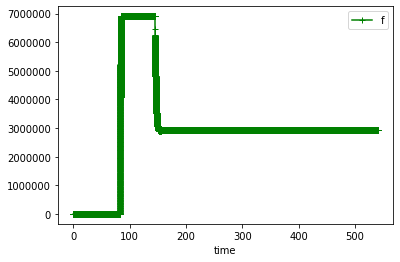

In [7]:
t=0
delta_t=1e-3
model = modulo(60*(10**3),0,300*(10**3))
spd=PIDSat(5000,1000,1000,6906*(10**3))
pos=PIDSat(2,0,64,1000)
tempi=[]
valori_p=[]
valori_v=[]
valori_p_target=[]
valori_f=[]
valori_speed_t=[]
while t<540:
    v=model.v
    p=model.z
    speed_target = pos.evaluate(-p, delta_t)
    v_error=speed_target-v
    power = spd.evaluate(v_error, delta_t)
    if power<0:
        power=0
    model.evaluate(power, delta_t)
    tempi.append(t)
    valori_p.append(p)
    valori_v.append(v)
    valori_p_target.append(0)
    valori_f.append(power)
    valori_speed_t.append(speed_target)
    t=t+delta_t
print (model.m)
print(min(valori_p))
print(valori_p[-1])
pylab.plot(tempi,valori_p,"b+-",label="altezza")
pylab.plot(tempi,valori_p_target,"r+-",label="ground level")
pylab.xlabel("time")
pylab.legend()
pylab.plot()
pylab.show()
pylab.plot(tempi,valori_speed_t,"y+-",label="velocità target")
pylab.plot(tempi,valori_v,"r+-",label="velocità")
pylab.xlabel("time")
pylab.legend()
pylab.plot()
pylab.show()
pylab.plot(tempi,valori_f,"g+-",label="f")
pylab.xlabel("time")
pylab.legend()
pylab.plot()
pylab.show()

20668.5
-124.81111635974739
-0.053131944093951125


D:\Users\ress\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


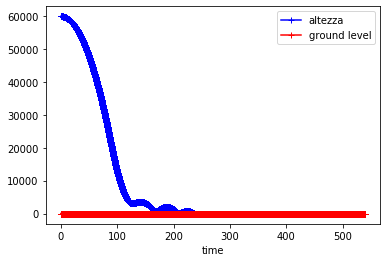

D:\Users\ress\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


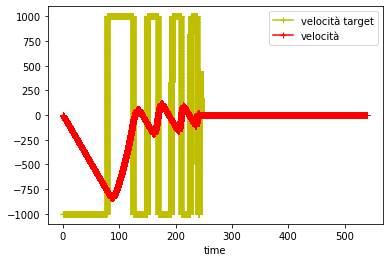

D:\Users\ress\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


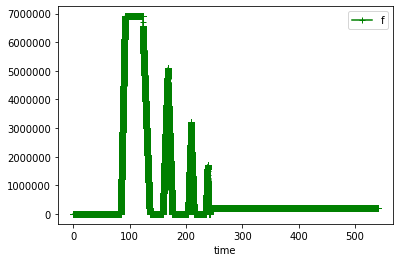

D:\Users\ress\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


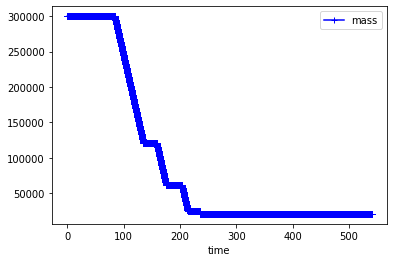

In [8]:
t=0
delta_t=1e-3
model = modulo(60*(10**3),0,300*(10**3))
spd=PIDSat(500,500,100,6906*(10**3))
pos=PIDSat(3,0,120,1000)
tempi=[]
valori_p=[]
valori_v=[]
valori_p_target=[]
valori_f=[]
valori_speed_t=[]
valori_m=[]
while t<540:
    v=model.v
    p=model.z
    speed_target = pos.evaluate(-p, delta_t)
    v_error=speed_target-v
    power = spd.evaluate(v_error, delta_t)
    if power<0:
        power=0
    if ((power>0) & (int(p)>0)):
        model.m=model.m-3.5
    model.evaluate(power, delta_t)
    tempi.append(t)
    valori_p.append(p)
    valori_v.append(v)
    valori_m.append(model.m)
    valori_p_target.append(0)
    valori_f.append(power)
    valori_speed_t.append(speed_target)
    t=t+delta_t
print (model.m)
print(min(valori_p))
print(valori_p[-1])
pylab.plot(tempi,valori_p,"b+-",label="altezza")
pylab.plot(tempi,valori_p_target,"r+-",label="ground level")
pylab.xlabel("time")
pylab.legend()
pylab.plot()
pylab.show()
pylab.plot(tempi,valori_speed_t,"y+-",label="velocità target")
pylab.plot(tempi,valori_v,"r+-",label="velocità")
pylab.xlabel("time")
pylab.legend()
pylab.plot()
pylab.show()
pylab.plot(tempi,valori_f,"g+-",label="f")
pylab.xlabel("time")
pylab.legend()
pylab.plot()
pylab.show()
pylab.plot(tempi,valori_m,"b+-",label="mass")
pylab.xlabel("time")
pylab.legend()
pylab.plot()
pylab.show()

In [1]:

import sys
import math


from PyQt5.QtWidgets import QMainWindow, QWidget, QApplication
from PyQt5.QtGui import QPainter, QColor, QFont, QPixmap, QTransform, QTextDocument
from PyQt5.QtCore import Qt, QTimer, QRectF
from autopilot import *


class MainWindow(QMainWindow):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(0, 0, 300, 1000)
        self.setWindowTitle('Falcon X Stage 1 simulator')
        self.drone = QPixmap("modulo.png")
        self.platform = QPixmap("platform.png")
        self.show()

        self.delta_t = 1e-3 
        
        self.autopilot = Autopilot()
        self.autopilot.z_target = 0

        self.timer = QTimer()
        self.timer.timeout.connect(self.go)
        self.timer.start(1000*self.delta_t)
        



    def go(self):
        self.autopilot.run(self.delta_t) 
        self.update() # repaint window


    def paintEvent(self, event):
        qp = QPainter()
        qp.begin(self)
        qp.setPen(QColor(255,255,255))
        qp.setBrush(QColor(255,255,255))
        qp.drawRect(event.rect())
        position=self.autopilot.model.p
        if (position<0):
            position=0
        x_pos = 140 
        y_pos = 900-(position/75 )
       # if ((self.autopilot.power>0) & (int(position)>0)):
              #self.autopilot.model.m=self.autopilot.model.m-3.4
        t = QTransform()
        s = self.drone.size()
        t.translate(x_pos + s.height()/2, y_pos + s.width()/2)
        t.translate(-(x_pos + s.height()/2), - (y_pos + s.width()/2))

        document = QTextDocument()
        altezza = QRectF(0,0,350,50)
        document.setTextWidth(altezza.width())
        document.setHtml(" <font size = '5'><b>Altezza</b>:   "+str(int(self.autopilot.model.p))+"m                  <br><b>Velocità</b>:   "+str(int(self.autopilot.model.v))+"m/s</font>")
        document.drawContents( qp, altezza)

        
        qp.setTransform(t)
        qp.setPen(QColor(255,0,0))
        qp.drawPixmap(x_pos,y_pos,self.drone)
        qp.drawPixmap(70,950,self.platform)
        qp.end()
        if (self.autopilot.power>0):
            self.drone = QPixmap("modulo_flames.png")
        else:
            self.drone = QPixmap("modulo.png")
        if (position==0):
            self.drone = QPixmap("modulo_landed.png")
                


def main():

    app = QApplication(sys.argv)
    ex = MainWindow()
    sys.exit(app.exec_())


if __name__ == '__main__':
    main()

SystemExit: 0

D:\Users\ress\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
